In [12]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
import geopandas as gpd
import shapely.geometry

import math

This is where the crs comes from: https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset#:~:text=EPSG%3A4326%20%2D%20WGS%2084%2C,including%20Google%20Maps%20and%20OpenStreetMap.

In [13]:
# county visualization shape file

gdf = gpd.read_file("cb_2018_us_county_500k/cb_2018_us_county_500k.shp")
#print(gdf.crs)
gdf.to_crs('EPSG:4326') # converts to WSG84
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [14]:
# Land that people can hunt on 

huntingland = gpd.read_file("FWS_National_2022_-_2023_Hunt_Units/FWS_NWRS_HQ_PubHuntUnits.shp")
#print(huntingland['geometry'].crs) # this checks the gemoetry type
huntingland = huntingland.to_crs('EPSG:4326') # converts to WSG84
huntingland = huntingland[huntingland['Huntable']=='Yes']
huntingland.head()

,OBJECTID,FBMS_Cost_,Hunt_Unit_,Acreage,GlobalID,Symbol_ID,Relate_GUI,Huntable,Organizati,Organiza_1,...,PermitRe_1,PermitObta,GlobalID_2,Creation_1,Creator,EditDate,Editor,SHAPE_Leng,SHAPE_Area,geometry
1,2,FF05RASR00,South Unit,297.741532,5c681611-d23c-45e6-9739-9475745b87f3,1,FF05RASR00_South Unit,Yes,53513.0,Assabet River National Wildlife Refuge,...,Other OMB-Approved Permit,Online Other,{C67982A3-52ED-4106-A597-2116C67155DF},2022-12-07,daniel_konzek@fws.gov_fws,2022-12-07,daniel_konzek@fws.gov_fws,4951.872335,1.204917e+06,"POLYGON ((-71.46967 42.39124, -71.46903 42.391..."
3,4,FF05RASR00,North Unit B,519.911973,2dc4ea8a-5c27-4f2a-bb25-7791cd40ad83,3,FF05RASR00_North Unit B,Yes,53513.0,Assabet River National Wildlife Refuge,...,Other OMB-Approved Permit,Online Other,{67AB3E5D-FC60-4290-AF2F-B326763F4B17},2022-12-07,daniel_konzek@fws.gov_fws,2022-12-07,daniel_konzek@fws.gov_fws,15022.888309,2.104009e+06,"POLYGON ((-71.46301 42.42332, -71.46026 42.417..."
4,5,FF05RASR00,North Unit A,1332.118232,85d7d74e-a85c-4201-8815-303c254ae862,4,FF05RASR00_North Unit A,Yes,53513.0,Assabet River National Wildlife Refuge,...,Other OMB-Approved Permit,Online Other,{BBA4BD7A-36D7-448D-AFBF-EB911C62802B},2022-12-07,daniel_konzek@fws.gov_fws,2022-12-07,daniel_konzek@fws.gov_fws,14193.307828,5.390891e+06,"POLYGON ((-71.46883 42.39492, -71.46901 42.394..."
5,6,FF02RKOP00,Open on entire refuge,4340.563356,6fdb1367-5910-48a2-9a34-825633ae6123,1,FF02RKOP00_Open on entire refuge,Yes,21661.0,Optima National Wildlife Refuge,...,NaN,NaN,{3CE7B613-A43C-4AF9-A8F2-45EBA2513F55},2022-12-07,daniel_konzek@fws.gov_fws,2022-12-07,daniel_konzek@fws.gov_fws,27218.675632,1.756564e+07,"POLYGON ((-101.21227 36.62913, -101.21493 36.6..."
7,8,FF02RKWM00,D,5484.736861,59de1915-a8a8-4ae3-a133-9f9138f0d209,1,FF02RKWM00_D,Yes,21670.0,Wichita Mountains Wildlife Refuge,...,Signed Brochure or Similar,"Kiosk, Online FWS, Visitor Center",{F80F657B-96CE-447C-9466-4B7215B585CC},2022-12-07,daniel_konzek@fws.gov_fws,2022-12-07,daniel_konzek@fws.gov_fws,27533.210564,2.219594e+07,"POLYGON ((-98.64969 34.78244, -98.64967 34.775..."


C:\Users\ljsobo\.conda\envs\working_env\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(22.0, 50.0)

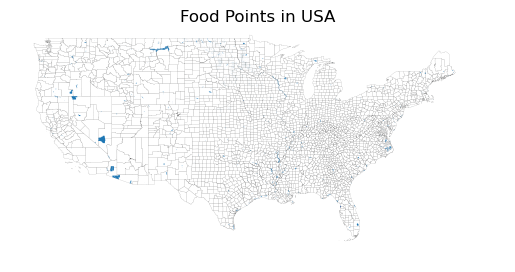

In [15]:
# First visualization

fig, ax = plt.subplots()

# points_gdf.plot(column='org_type', categorical=True, ax=ax, cmap='Set1', 
#                 zorder=3, marker = '.', markersize = 1, edgecolor = 'none',
#                legend=True, legend_kwds={'bbox_to_anchor':(.175,.35),'fontsize':4,'frameon':False,'markerscale':.5}
#                ) # these are the points

huntingland.plot(zorder = 2, ax = ax)

gdf.plot(column = 'STATEFP' ,color = 'white' , edgecolor = 'black',ax = ax, zorder = 1, linewidth=.05) # this is the US map


ax.axis('off')
ax.set_title('Food Points in USA',fontsize=12)


ax.set_xlim(-128, -60)
#ax.get_ylim()[1] #- use this for the full y axis
ax.set_ylim(22,50)
#plt.savefig('US_MAP.jpg',dpi = 4800)

In [16]:
# Different game available on the land

gametype = pd.read_csv('FWS_National_2022_-_2023_Hunt_Units.csv')
gametype.head()

,OBJECTID,CCCODE,State,HuntUnit,Access,Category,Species,MethodOfTake,DateTime,BagLimits,TargetedDemographic,SpecialOpportunities,Relate_GUID,GlobalID,CreationDate,Creator,EditDate,Editor
0,1,FF02RNLV00,New Mexico,Ag Field East,Hunting for this species on this hunt unit is ...,Big Game,Elk,State Regulations Apply,State Regulations Apply,State Regulations Apply,youth,NaN,FF02RNLV00_Ag Field East,{392EFEE2-E6B1-4683-A5C4-8D75712A9042},2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws,2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws
1,2,FF02RNLV00,New Mexico,Gallinas,Hunting for this species on this hunt unit is ...,Big Game,Elk,State Regulations Apply,State Regulations Apply,State Regulations Apply,youth,NaN,FF02RNLV00_Gallinas,{3B623A87-C624-4674-88C3-22F34D001372},2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws,2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws
2,3,FF02RNLV00,New Mexico,Vegosa,Hunting for this species on this hunt unit is ...,Big Game,Elk,State Regulations Apply,State Regulations Apply,State Regulations Apply,youth,NaN,FF02RNLV00_Vegosa,{C163312E-688F-4387-9E95-219F2F729DFB},2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws,2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws
3,4,FF02RNLV00,New Mexico,Ag Field,Hunting for this species on this hunt unit is ...,Waterfowl,Dark Geese,State Regulations Apply,Special Regulations Apply,Special Regulations Apply,NaN,NaN,FF02RNLV00_Ag Field,{95C485CF-C28D-48B0-B0B0-5F6C0ECA5231},2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws,2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws
4,5,FF02RNLV00,New Mexico,Ag Field East,Hunting for this species on this hunt unit is ...,Waterfowl,Dark Geese,State Regulations Apply,Special Regulations Apply,Special Regulations Apply,NaN,NaN,FF02RNLV00_Ag Field East,{B64F8CAC-E12F-4491-AA6B-81B1E603B505},2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws,2022/12/07 15:25:18+00,daniel_konzek@fws.gov_fws


In [17]:
keep_game = ['Elk','Dark Geese', 'Dove', 'Light Geese',
            'Quail', 'Squirrel','Rabbit & Hare','Coot', 'Duck',
            'Feral Hog', 'Teal', 'White-Tailed Deer', 'Gallinule', 'Sea Duck',
            'Turkey', 'Moorhen', 'Swan', 'Grouse', 'Pronghorn',
            'Pheasant', 'Bear', 'Partridge', 'Sika Deer',
            'Mule Deer', 'Sandhill Crane', 'Moose', 'Caribou', 'Javelina',
            'Mountain Lion', 'Cormorant',
            'Prairie Dog', 'Pigeon', 'Bighorn Sheep',
            'Greater Prairie Chicken', 'Chukar', 'Alligator',
            'Nilgai Antelope', 'Mountain Goat', 'Fallow Deer',
            'Black-Tailed Deer', 'Russian Boar', 'Bison',
            'Dall Sheep', 'Oryx', 'Muskox']
keep_game = set(keep_game)
gametype['usable_game'] = gametype.apply(lambda x: 1 if x['Species'] in keep_game else 0,axis = 1)
gametype = gametype[['OBJECTID','usable_game']]
gametype = gametype[gametype['usable_game']>0]

In [18]:
# This gives us census tract data from the ACS

census_tract = pd.read_csv('census_tract.csv', encoding="latin-1")
cols = list(census_tract.columns)
keep_cols = []
i = 0
for col in cols:
    if col[0:8] == 'Estimate':
        keep_cols.append(col)
    elif i == 0:
        keep_cols.append(col)
    elif i == 1:
        keep_cols.append(col)
    i+=1
del cols
census_tract = census_tract[keep_cols]
#census_tract.head()

C:\Users\ljsobo\AppData\Local\Temp\15\ipykernel_31468\431324479.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,107,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,127,128,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271

In [19]:
# this is the data I want to use
data_list =['Geography',
            'Geographic Area Name',
            'Estimate!!Total!!Total population',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!White',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Black or African American',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!American Indian and Alaska Native',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Asian',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Native Hawaiian and Other Pacific Islander',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!One race!!Some other race',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race)',
            'Estimate!!Total!!Total population!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino',
            'Estimate!!Total!!POVERTY STATUS IN THE PAST 12 MONTHS!!Population for whom poverty status is determined',
            'Estimate!!Total!!POVERTY STATUS IN THE PAST 12 MONTHS!!Population for whom poverty status is determined!!Below 100 percent of the poverty level',
            'Estimate!!Total!!POVERTY STATUS IN THE PAST 12 MONTHS!!Population for whom poverty status is determined!!100 to 149 percent of the poverty level',
            'Estimate!!Total!!POVERTY STATUS IN THE PAST 12 MONTHS!!Population for whom poverty status is determined!!At or above 150 percent of the poverty level']


col_list = ['Geography','Geographic Area Name', 'population','White','Black',
            'Native American','Asian','Hawaiian Pacific Islander', 'Other Race',
            'Two or More','Hispanic','White not Hispanic','povertystatus_denom','below_poverty', '100-% poverty',
            '150-% poverty', '150+% poverty']

conversion_dict = dict(zip(data_list, col_list))
census_tract = census_tract[data_list]
census_tract = census_tract.rename(mapper = conversion_dict, axis = 1)

In [20]:
# I am doing a very evil thing here 
def newstring(string):
    return(string[9:])
census_tract['GEO_ID'] = census_tract['Geography'].apply(lambda x: newstring(x))
def newstring(string):
    return(string[0:2])
FIPS = census_tract['GEO_ID'].apply(lambda x: newstring(x))
FIPS = FIPS.unique()

In [21]:
census_tract.head()

,Geography,Geographic Area Name,population,White,Black,Native American,Asian,Hawaiian Pacific Islander,Other Race,Two or More,Hispanic,White not Hispanic,povertystatus_denom,below_poverty,100-% poverty,150-% poverty,GEO_ID
0,1400000US01001020100,"Census Tract 201, Autauga County, Alabama",1941.0,79.2,12.1,0,2.1,0,0,6.6,1.7,77.5,1941.0,13.7,4.5,81.9,01001020100
1,1400000US01001020200,"Census Tract 202, Autauga County, Alabama",1757.0,36.8,58.4,0,0,1.4,0.8,2.6,1.7,36.5,1511.0,17,8.4,74.6,01001020200
2,1400000US01001020300,"Census Tract 203, Autauga County, Alabama",3694.0,64,28.2,0,1.2,0,4.9,1.8,4.9,64,3694.0,14.4,8.4,77.2,01001020300
3,1400000US01001020400,"Census Tract 204, Autauga County, Alabama",3539.0,87.5,8.7,0.3,0.5,0,0,3,0.5,87.2,3539.0,7.9,6.3,85.8,01001020400
4,1400000US01001020501,"Census Tract 205.01, Autauga County, Alabama",4306.0,82.5,15.3,0,1.9,0,0,0.3,0.8,81.7,4306.0,18.6,2.3,79,01001020501


In [22]:
""" this is how I construct the wgts between 0 and 1, it depends evenly '
    on the percent black native hawaiian other t and belowe 100% of the poverty line"""

names = ['Black','Native American','Hawaiian Pacific Islander',
         'Other Race','Two or More',"Hispanic",'below_poverty']

census_tract[names] = census_tract[names].apply(pd.to_numeric, errors='coerce', axis=1)
census_tract['wgt'] = census_tract[names].sum(axis = 1)
census_tract['county_id'] = census_tract['GEO_ID'].apply(lambda x: x[0:5])
census_county = census_tract.groupby('county_id').sum().reset_index()
census_county = census_county[['wgt','county_id']].rename({'wgt':'wgt_sum'},axis = 1)
census_tract = census_tract.merge(census_county, on = 'county_id',how = 'left')
census_tract['wgt'] = census_tract['wgt']/census_tract['wgt_sum']

right_df = census_tract[['GEO_ID','county_id','wgt']]

Our center is the mean lat and longitude of all available points:

- share by race that is food insecure white black hispanic and other
- other is pi and native american

- 150\% of federal poverty line
- Percent of the county's population that is in the cnesus tract

In [23]:
# this is how I get the shape files for census tract by county

censustract_gdflist = []
for fip in FIPS:
    
    url = 'Census Tract Shape Files/tl_2020_'+fip+'_tract/tl_2020_'+fip+'_tract.shp'

    ctract = gpd.read_file(url)
    ctract = ctract.to_crs("EPSG:3857") # Web mercator 84 like wsg 84 but the projection version
    ctract['centroid'] = ctract['geometry'].centroid
    ctract['lon'] = ctract.centroid.apply(lambda p: p.x)
    ctract['lat'] = ctract.centroid.apply(lambda p: p.y)
    censustract_gdflist.append(ctract)

In [24]:
# Get the centroid of huntable land

huntingland_centroid = huntingland.to_crs("EPSG:3857") # Web mercator 84 like wsg 84 but the projection version
huntingland_centroid['centroid'] = huntingland_centroid['geometry'].centroid
huntingland_centroid['lon'] = huntingland_centroid.centroid.apply(lambda p: p.x)
huntingland_centroid['lat'] = huntingland_centroid.centroid.apply(lambda p: p.y)

huntingland_centroid = huntingland_centroid[['OBJECTID','lon','lat']]

In [25]:
huntingland_centroid.head()

,OBJECTID,lon,lat
1,2,-7.955968e+06,5.218881e+06
3,4,-7.957211e+06,5.223020e+06
4,5,-7.955974e+06,5.222332e+06
5,6,-1.126685e+07,4.389227e+06
7,8,-1.098034e+07,4.131297e+06


In [26]:
#this is the weighted centroid
synth_family = pd.DataFrame(columns = ['county_id','lon_wgt','lat_wgt'])
for geodf in censustract_gdflist:
    geodf = geodf.merge(right_df, left_on = 'GEOID',right_on = 'GEO_ID')
    geodf[['lon_wgt','lat_wgt']] = geodf[['lon','lat']].multiply(geodf['wgt'],axis=0)
    geodf = geodf[['lon_wgt','lat_wgt','county_id']].groupby('county_id').sum().reset_index()
    synth_family = pd.concat([synth_family,geodf])
    

In [27]:
synth_family.head()

,county_id,lon_wgt,lat_wgt
0,01001,-9.631616e+06,3.828302e+06
1,01003,-9.770076e+06,3.579159e+06
2,01005,-9.498573e+06,3.745716e+06
3,01007,-9.703619e+06,3.893364e+06
4,01009,-9.633014e+06,4.023804e+06


In [28]:
# I lose some territories
synth_family = synth_family.dropna(axis = 0)
synth_family_gdf = gpd.GeoDataFrame(synth_family,
                                            geometry=gpd.points_from_xy(synth_family.lon_wgt, synth_family.lat_wgt),
                                            crs="EPSG:3857")
synth_family_gdf = synth_family_gdf.to_crs("EPSG:4326") # to degrees
#synth_family= synth_family.to_crs("EPSG:4269")


In [29]:
csa_names = ['listing_id','location_x','location_y',
             'acceptedpayment','FNAP','products','product_fruit',
             'product_vegetables','product_fishseafood',
             'product_poultryfowl_otherdesc','product_poultryfowl','product_redmeat']

farmersmarket_names = ['listing_id','location_x','location_y','acceptedpayment','FNAP']

foodhubs_names = ['listing_id','location_x','location_y','acceptedpayment','FNAP','products']



farm_mark = pd.read_excel('PointData/FarmersMarket.xlsx')
farm_mark = farm_mark[farmersmarket_names]
farm_mark_gdf = gpd.GeoDataFrame(farm_mark, 
                                 geometry=gpd.points_from_xy(farm_mark.location_x, farm_mark.location_y),
                                 crs="EPSG:4269") # not sure but they are long and lat
farm_mark_gdf = farm_mark_gdf[farm_mark_gdf['geometry'].is_empty != True]

csa = pd.read_excel('PointData/CSA.xlsx')
csa = csa[csa_names]
csa_gdf = gpd.GeoDataFrame(csa,
                           geometry=gpd.points_from_xy(csa.location_x, csa.location_y),
                           crs="EPSG:4269")
csa_gdf = csa_gdf[csa_gdf['geometry'].is_empty != True]


foodhub = pd.read_excel('PointData/Foodhub.xlsx')
foodhub = foodhub[foodhubs_names]
foodhub_gdf = gpd.GeoDataFrame(foodhub,
                               geometry=gpd.points_from_xy(foodhub.location_x, foodhub.location_y),
                               crs="EPSG:4269")
foodhub_gdf = foodhub_gdf[foodhub_gdf['geometry'].is_empty != True]


del csa,foodhub,farm_mark

farm_mark_gdf = farm_mark_gdf.to_crs("EPSG:4326") # to degrees
foodhub_gdf = foodhub_gdf.to_crs("EPSG:4326")
csa_gdf = csa_gdf.to_crs("EPSG:4326")


In [30]:
huntingland_centroid_df=pd.DataFrame(huntingland_centroid)
huntingland_centroid_gdf=gpd.GeoDataFrame(huntingland_centroid_df, 
                                          geometry = gpd.points_from_xy(huntingland_centroid_df.lon, huntingland_centroid_df.lat),
                                          crs = 'EPSG:3857')

huntingland_centroid_gdf = huntingland_centroid_gdf.to_crs("EPSG:4326")

In [31]:
#Vegetables
fruit_veglist = ['product_vegetables','product_fruit']
for plant in fruit_veglist:
    csa_gdf[plant] = csa_gdf[plant].isnull()
    csa_gdf[plant] = csa_gdf.apply(lambda x: 1 if x[plant] == False else 0, axis = 1)

#Meatlist
meatlist = ['product_fishseafood','product_poultryfowl_otherdesc','product_poultryfowl','product_redmeat']
for meat in meatlist:
    csa_gdf[meat] = csa_gdf[meat].isnull()
    csa_gdf[meat] = csa_gdf.apply(lambda x: 1 if x[meat] == False else 0, axis = 1)

csa_gdf['plant'] = csa_gdf[fruit_veglist].sum(axis=1)
csa_gdf['meat'] = csa_gdf[meatlist].sum(axis=1)


In [32]:
# this is for meat and plant 

cols = ['listing_id','geometry']

meat_gdf = csa_gdf[csa_gdf['meat']>=1]
plant_gdf = csa_gdf[csa_gdf['plant']>=1]

meat_gdf = pd.concat([meat_gdf[cols],farm_mark_gdf[cols]],axis = 0)
plant_gdf = pd.concat([plant_gdf[cols],farm_mark_gdf[cols]],axis = 0)


divide up point data into meat veg and foodhub if wic and/or snap, min distance by each category

In [33]:
synth_family_df = pd.DataFrame(synth_family_gdf)
meat_df = pd.DataFrame(meat_gdf)
foodhub_df = pd.DataFrame(foodhub_gdf)
plant_df = pd.DataFrame(plant_gdf)
huntingland_centroid_df = pd.DataFrame(huntingland_centroid_gdf)
huntingland_centroid_df = huntingland_centroid_df[['OBJECTID','geometry']]

In [34]:
huntingland_centroid_df = huntingland_centroid_df.merge(gametype, 
                                                        how = 'left', on = 'OBJECTID',indicator = True)
huntingland_centroid_df =  huntingland_centroid_df[huntingland_centroid_df['_merge']=='both']
huntingland_centroid_df =  huntingland_centroid_df[['OBJECTID','geometry']]

In [35]:
#Calculate distance using the Haversine Formula
def rad(deg):
    radians = deg * math.pi/180
    return(radians)

def haversine(coord1,coord2):
    
    lon1 = rad(coord1.x)
    lat1 = rad(coord1.y)
    lon2 = rad(coord2.x)
    lat2 = rad(coord1.y)

    r = 6371000.7900 
    
    delta_phi = lat2 - lat1
    delta_lambda = lon2 - lon1

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = r * c  # output distance in meters
    miles = meters * 0.0006213711922 # output distance in miles
    
    miles = round(miles, 2)


    return(miles)

In [36]:
def min_distance(df_list,synth_family_df,name_list):
    output_df = pd.DataFrame(synth_family_df['county_id'])
    i = 0
    for df in df_list:
        cross_prod = synth_family_df.merge(df, how = 'cross')
        cross_prod['distance'] = cross_prod.apply(lambda x: haversine(x['geometry_x'], x['geometry_y']), axis = 1)
        
        temp_df = cross_prod.groupby('county_id').min('distance').reset_index()
        temp_df = temp_df[['county_id','distance']]
        name = 'distance_'+name_list[i]
        temp_df = temp_df.rename({'distance':name},axis = 1)
        i+=1
        output_df = output_df.merge(temp_df, how = 'left', on = 'county_id')
        
    return(output_df)

C:\Users\ljsobo\.conda\envs\working_env\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


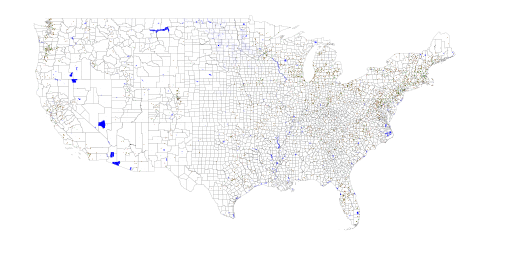

In [45]:
# #synth_family

fig, ax = plt.subplots()

synth_family_gdf.plot( ax=ax, zorder=2, marker = '.', markersize = .1,edgecolor = 'none') # these are the points

gdf.plot(column = 'STATEFP' ,color = 'white' , edgecolor = 'black',ax = ax, zorder = 1, linewidth=.05) # this is the US map

huntingland.plot(zorder = 3, ax = ax, markersize = .1, color = 'blue')
meat_gdf.plot(zorder = 4, ax = ax, markersize = .1,edgecolor = 'none', color = 'red')
foodhub_gdf.plot(zorder = 5, ax = ax, markersize = .1,edgecolor = 'none', color = 'brown')
plant_gdf.plot(zorder = 6, ax = ax, markersize = .1,edgecolor = 'none', color = 'green')



ax.axis('off')

ax.set_xlim(-128, -60)
#ax.get_ylim()[1] - use this for the full y axis
ax.set_ylim(22,50)
plt.savefig('synthetic_hh.jpg',dpi = 4800)

In [38]:
df_list = [meat_df, plant_df, foodhub_df,huntingland_centroid_df]
name_list = ['meat','plant','foodhub','hunting']

location_df = min_distance(df_list,synth_family_df,name_list)

In [ ]:
location_df.to_excel('county_distance.xlsx')

PCA component

In [39]:
county_food_sec_df = pd.read_csv('variables_for_index_clean.csv')
county_food_sec_df = pd.pivot(county_food_sec_df, index='fips', columns='variable_name', values='value').reset_index()
county_food_sec_df= county_food_sec_df.dropna(axis = 0)
county_food_sec_df.head()

variable_name,fips,food_banks,food_insecurity_rate,pct_laccess_hhnv
51,1001,0.0,0.157,0.033513
52,1003,0.0,0.134,0.019051
53,1005,0.0,0.207,0.043294
54,1007,0.0,0.163,0.028214
55,1009,0.0,0.145,0.033364


In [40]:
location_df['county_id'] = pd.to_numeric(location_df['county_id'])
master_df = location_df.merge(county_food_sec_df,how = 'left', left_on ='county_id',right_on = 'fips' )

In [ ]:
master_df.to_excel('master_file.xlsx')

In [ ]:
# read stuff in

In [41]:
master_df = pd.read_excel('master_file.xlsx')
master_df.head()

,Unnamed: 0,county_id,distance_meat,distance_plant,distance_foodhub,distance_hunting,fips,food_banks,food_insecurity_rate,pct_laccess_hhnv
0,0,1001,0.03,0.03,4.32,19.02,1001.0,0.0,0.157,0.033513
1,1,1003,0.23,0.02,0.13,0.38,1003.0,0.0,0.134,0.019051
2,2,1005,0.06,0.06,3.04,13.21,1005.0,0.0,0.207,0.043294
3,3,1007,0.67,0.67,13.54,12.29,1007.0,0.0,0.163,0.028214
4,4,1009,0.69,0.69,3.53,17.98,1009.0,0.0,0.145,0.033364


In [8]:
gdf['county_id'] = gdf.apply(lambda x: str(x['STATEFP'])+str(x['COUNTYFP']),axis = 1)
gdf['county_id'] = pd.to_numeric(gdf['geoid'])

KeyError: 'geoid'

In [9]:
food_sec_gdf= gdf.merge(index, how = 'left', on = 'county_id')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

NameError: name 'food_sec_gdf' is not defined

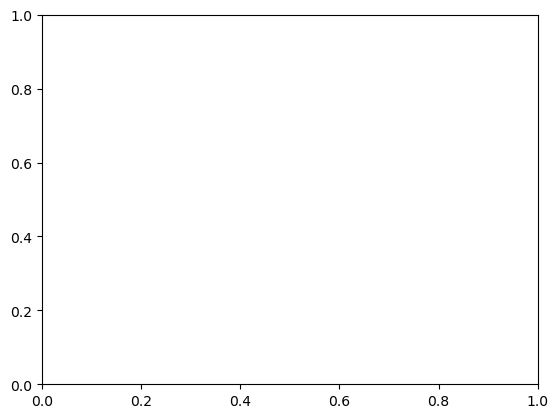

In [7]:
# #synth_family

fig, ax = plt.subplots()

food_sec_gdf.plot(column = 'index' ,ax = ax,cmap = 'seismic',
                  zorder = 1, linewidth=.05,
                  legend = True ) # this is the US map

# huntingland.plot(zorder = 3, ax = ax, markersize = .1)
# meat_gdf.plot(zorder = 4, ax = ax, markersize = .1)
# foodhub_gdf.plot(zorder = 5, ax = ax, markersize = .1)
# plant_gdf.plot(zorder = 6, ax = ax, markersize = .1)



ax.axis('off')

ax.set_xlim(-128, -60)
#ax.get_ylim()[1] - use this for the full y axis
ax.set_ylim(22,50)
plt.savefig('INDEX_MAP.jpg',dpi = 4800)